In [2]:
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import json
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from collections import Counter
import operator
from random import randint
import pickle
import re
import os
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random

def readPickle():
	with open('dataset.pickle', 'rb') as data:
		data = pickle.load(data)
	return(data)

def removeNode(data):
	r1 = '[0-9’!１２３４５６７８９０"#$%&\'()（）*+,-/:;<=>?@，。?★、…【】《》＊;「」？“”‘’！：[\\]^_`{|}~‧，？.～ ；]+'
	for i in range(len(data)):
	#for i in range(1):
		for j in range(len(data[i][1])):
			data[i][1][j] = re.sub(r1,'',data[i][1][j])

	for i in range(len(data)):
		needRemove = 0
		for j in range(len(data[i][1])):
			if data[i][1][j-needRemove] == '':
				#print(j,j-needRemove,)
				data[i][1].remove(data[i][1][j-needRemove])
				needRemove += 1
	return(data)

def loadStopwords():
	stopwords = []
	with open('CN_stopwords.txt', 'r', encoding='UTF-8') as f1:
		for line in f1:
			stopwords += (line.split())
	return(stopwords)

def splitTrainTest(data):
	len_all = len(data)
	boundary = int(len_all*7/8)
# 	print(boundary)
	random.shuffle(data)
	train_data = data[0:boundary]
	test_data = data[boundary:]
	train_size = boundary
	test_size = len_all - boundary


	return(train_data, test_data, train_size, test_size)

def makeDataList(train_data, test_data):
	train_x = []
	train_y = []
	test_x = []
	test_y = []
	train_str = []
	test_str = []
	for i in range(len(train_data)):
		train_x.append(train_data[i][1])
		train_y.append(train_data[i][0])
	for i in range(len(test_data)):
		test_x.append(test_data[i][1])
		test_y.append(test_data[i][0])

	for i in range(len(train_x)):
		str1 = ' '.join(train_x[i])
		str1 = re.sub('\n','',str1)
		train_str.append(str1)

	for i in range(len(test_x)):
		str1 = ' '.join(test_x[i])
		str1 = re.sub('\n','',str1)
		test_str.append(str1)
	return(train_str, test_str, train_y, test_y)

def dataRepresent(CN_stopwords, train_str, test_str):
	tfidfconverter = TfidfVectorizer(max_features = feature_num, min_df=5, max_df=0.6, stop_words=CN_stopwords) 
# 	print("======== method : tfidfconverter =========")
	train_x = tfidfconverter.fit_transform(train_str).toarray()
	features = tfidfconverter.get_feature_names()
# 	print("======== features : tfidfconverter =========")
# 	print(tfidfconverter.get_feature_names())
	temp = TfidfVectorizer(vocabulary=features)
	test_x = temp.fit_transform(test_str).toarray()

	return train_x, test_x, temp

D:\python3.7\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\python3.7\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
# =========================== main function ===========================
# ================ use tf-base feature selection ======================
from sklearn.naive_bayes import MultinomialNB

record = []

data = readPickle()
data = removeNode(data)
CN_stopwords = loadStopwords()
train_data, test_data, train_size, test_size = splitTrainTest(data)
train_str, test_str, train_y, test_y = makeDataList(train_data, test_data)

for iter_num in range(1, 1001):
    
    print('n_features:', iter_num)    
    
    feature_num = iter_num
    train_x, test_x, tfidf_converter = dataRepresent(CN_stopwords, train_str, test_str)

    classifier = MultinomialNB()  
    classifier.fit(train_x, train_y[:train_size])

    pred_y = classifier.predict(test_x) 

    record.append(accuracy_score(test_y, pred_y))

iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
iteration: 72
i

iteration: 555
iteration: 556
iteration: 557
iteration: 558
iteration: 559
iteration: 560
iteration: 561
iteration: 562
iteration: 563
iteration: 564
iteration: 565
iteration: 566
iteration: 567
iteration: 568
iteration: 569
iteration: 570
iteration: 571
iteration: 572
iteration: 573
iteration: 574
iteration: 575
iteration: 576
iteration: 577
iteration: 578
iteration: 579
iteration: 580
iteration: 581
iteration: 582
iteration: 583
iteration: 584
iteration: 585
iteration: 586
iteration: 587
iteration: 588
iteration: 589
iteration: 590
iteration: 591
iteration: 592
iteration: 593
iteration: 594
iteration: 595
iteration: 596
iteration: 597
iteration: 598
iteration: 599
iteration: 600
iteration: 601
iteration: 602
iteration: 603
iteration: 604
iteration: 605
iteration: 606
iteration: 607
iteration: 608
iteration: 609
iteration: 610
iteration: 611
iteration: 612
iteration: 613
iteration: 614
iteration: 615
iteration: 616
iteration: 617
iteration: 618
iteration: 619
iteration: 620
iteration:

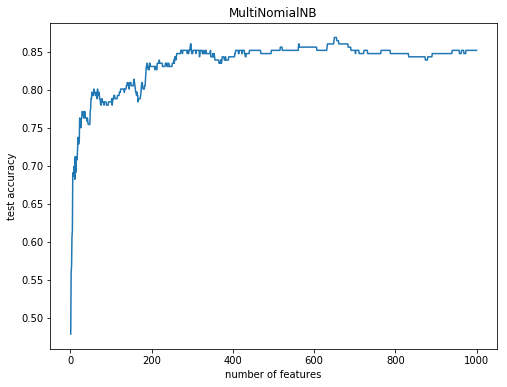

In [17]:
iters = [i for i in range(1, 1001)]

# ============================== plotting ============================

plt.figure(figsize=(8, 6))
plt.plot(iters, record)
plt.xlabel('number of features')
plt.ylabel('test accuracy')
plt.title('MultiNomialNB')
plt.savefig('Multi-NB-feature-selection.png')